<a href="https://colab.research.google.com/github/Geek-a-Byte/ML-sessional/blob/main/lab7/eval_on_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1st

In [ ]:
#Importing the necessary libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.layers import Dense, Input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas
inputDataFrame=pandas.read_csv('/content/drive/MyDrive/CSE 442/Dataset Section A1 Evaluation_The Egyptian Mummy - Sheet1.csv')
inputDataFrame

,gold,age,iron,silver,inEgypt,isAKing,real_price,black_market_price
0,77,6162,582,2723,1,0,17771.50,45731626
1,66,5245,902,1822,1,1,14187.25,31654669
2,60,5369,806,209,0,0,5405.25,29523078
3,37,6453,745,2802,0,1,18528.25,50053807
4,56,6447,769,2273,0,0,15843.75,47324835
...,...,...,...,...,...,...,...,...
993,1,6198,987,659,0,0,7815.50,39823655
994,41,6592,545,2896,1,0,18273.00,52141986
995,57,6299,971,772,1,1,9317.75,41226475
996,10,5996,797,1823,0,1,13405.00,39915654


# 2nd

In [ ]:
# importing the classes for building the neural network layers
from keras.layers import Dense,Input

In [ ]:
#Preparing my layers
input=Input(shape=6)
layer1=Dense(units=1,activation='relu',use_bias=True,name="first_dense_layer")


In [ ]:
# Let us check the weights in the layers
print(layer1.weights)


[]


In [ ]:
# Let us build the model
model=Sequential()
model.add(input)
model.add(layer1)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_dense_layer (Dense)   (None, 1)                 7         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dir(model)

In [ ]:
model._name

'sequential_2'

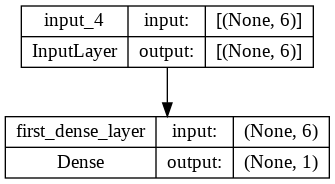

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Let us check the weights again
print(layer1.weights)


[<tf.Variable 'first_dense_layer/kernel:0' shape=(6, 1) dtype=float32, numpy=
array([[ 0.47194636],
       [ 0.15249586],
       [-0.6445307 ],
       [-0.7717182 ],
       [-0.29558206],
       [ 0.04362321]], dtype=float32)>, <tf.Variable 'first_dense_layer/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [ ]:
x1s=inputDataFrame['gold'].to_numpy()
x2s=inputDataFrame['age'].to_numpy()
x3s=inputDataFrame['iron'].to_numpy()
x4s=inputDataFrame['silver'].to_numpy()
x5s=inputDataFrame['inEgypt'].to_numpy()
x6s=inputDataFrame['isAKing'].to_numpy()
y1s=inputDataFrame['real_price'].to_numpy()
# gold	age	iron	silver	inEgypt	isAKing	real_price	black_market_price

In [ ]:
x1s.shape

(998,)

In [ ]:
x1s=x1s.reshape(x1s.shape[0],1)
x2s=x2s.reshape(x2s.shape[0],1)
x3s=x3s.reshape(x3s.shape[0],1)
x4s=x4s.reshape(x4s.shape[0],1)
x5s=x5s.reshape(x5s.shape[0],1)
x6s=x6s.reshape(x6s.shape[0],1)

In [ ]:
x=np.concatenate((x1s,x2s,x3s,x4s,x5s,x6s),axis=1)

In [ ]:
x.shape

(998, 6)

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
xTrain, xTest, y1sTrain, y1sTest = train_test_split(x, y1s, test_size=0.20, random_state=42)
print(f'x={xTrain[0]},y1={y1sTrain[0]}')

x=[   6 5370  597 1824    1    0],y1=12413.5


In [ ]:
# configure the training
model.compile(loss='mse',metrics=['mse'],optimizer=tf.optimizers.Adam(learning_rate=0.005))

In [ ]:
# train the model. just run a few epochs for this test run. you can adjust later.
model.fit(x=xTrain,y=y1sTrain,validation_data=(xTest, y1sTest),batch_size=128, epochs=20)

Epoch 1/20
7/7 [==============================] - 1s 34ms/step - loss: 162193808.0000 - mse: 162193808.0000 - val_loss: 144874896.0000 - val_mse: 144874896.0000
Epoch 2/20
7/7 [==============================] - 0s 8ms/step - loss: 161189440.0000 - mse: 161189440.0000 - val_loss: 143089776.0000 - val_mse: 143089776.0000
Epoch 3/20
7/7 [==============================] - 0s 7ms/step - loss: 159481184.0000 - mse: 159481184.0000 - val_loss: 140110672.0000 - val_mse: 140110656.0000
Epoch 4/20
7/7 [==============================] - 0s 9ms/step - loss: 156371408.0000 - mse: 156371408.0000 - val_loss: 135347696.0000 - val_mse: 135347696.0000
Epoch 5/20
7/7 [==============================] - 0s 8ms/step - loss: 150705264.0000 - mse: 150705264.0000 - val_loss: 128158416.0000 - val_mse: 128158416.0000
Epoch 6/20
7/7 [==============================] - 0s 7ms/step - loss: 142590080.0000 - mse: 142590080.0000 - val_loss: 119936944.0000 - val_mse: 119936944.0000
Epoch 7/20
7/7 [=======================

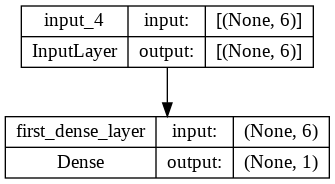

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# 3rd

In [ ]:
y2s=inputDataFrame['black_market_price'].to_numpy()

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
xTrain, xTest, y2sTrain, y2sTest = train_test_split(x, y2s, test_size=0.20, random_state=42)
print(f'x={xTrain[0]},y1={y1sTrain[0]}')

x=[   6 5370  597 1824    1    0],y1=12413.5


In [ ]:
# configure the training
model.compile(loss='mse',metrics=['mse'],optimizer=tf.optimizers.Adam(learning_rate=0.005))

In [ ]:
# train the model. just run a few epochs for this test run. you can adjust later.
model.fit(x=xTrain,y=y1sTrain,validation_data=(xTest, y1sTest),batch_size=128, epochs=20)

Epoch 1/20
7/7 [==============================] - 0s 24ms/step - loss: 57180000.0000 - mse: 57180000.0000 - val_loss: 45310924.0000 - val_mse: 45310924.0000
Epoch 2/20
7/7 [==============================] - 0s 5ms/step - loss: 53481804.0000 - mse: 53481804.0000 - val_loss: 42119940.0000 - val_mse: 42119940.0000
Epoch 3/20
7/7 [==============================] - 0s 9ms/step - loss: 49894416.0000 - mse: 49894416.0000 - val_loss: 39124804.0000 - val_mse: 39124804.0000
Epoch 4/20
7/7 [==============================] - 0s 6ms/step - loss: 46587100.0000 - mse: 46587100.0000 - val_loss: 36341684.0000 - val_mse: 36341684.0000
Epoch 5/20
7/7 [==============================] - 0s 6ms/step - loss: 43472116.0000 - mse: 43472116.0000 - val_loss: 33765564.0000 - val_mse: 33765564.0000
Epoch 6/20
7/7 [==============================] - 0s 7ms/step - loss: 40562656.0000 - mse: 40562656.0000 - val_loss: 31419710.0000 - val_mse: 31419710.0000
Epoch 7/20
7/7 [==============================] - 0s 7ms/step -

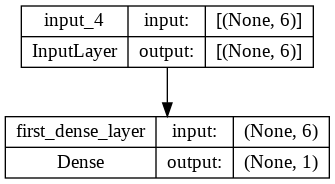

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# 4th

In [ ]:
# importing the classes for building the neural network layers
from tensorflow.keras.layers import Dense,Input,Concatenate

In [ ]:
initialiezer=tf.keras.initializers.RandomUniform(minval=0.0005, maxval=1, seed=100)

input1= Input(shape=1)
input2= Input(shape=1)
input3= Input(shape=1)
input4= Input(shape=1)
input5= Input(shape=1)
input6= Input(shape=1)

l1=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(input1)
l1=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(l1)

l2=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(input2)
l2=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(l2)

l3=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(input3)
l3=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(l3)

l4=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(input4)
l4=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(l4)

l5=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(input5)
l5=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(l5)

l6=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(input6)
l6=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(l6)

concatted = Concatenate()([l1, l2,l3,l4,l5,l6])
out1=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(concatted)
out1=Dense(units=1,use_bias=True,activation='relu',kernel_initializer=initialiezer)(out1)

out2=Dense(units=5,use_bias=True,activation='relu',kernel_initializer=initialiezer)(concatted)
out2=Dense(units=1,use_bias=True,activation='relu',kernel_initializer=initialiezer)(out2)

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
model=Model([input1,input2,input3,input4,input5,input6],[out1,out2])

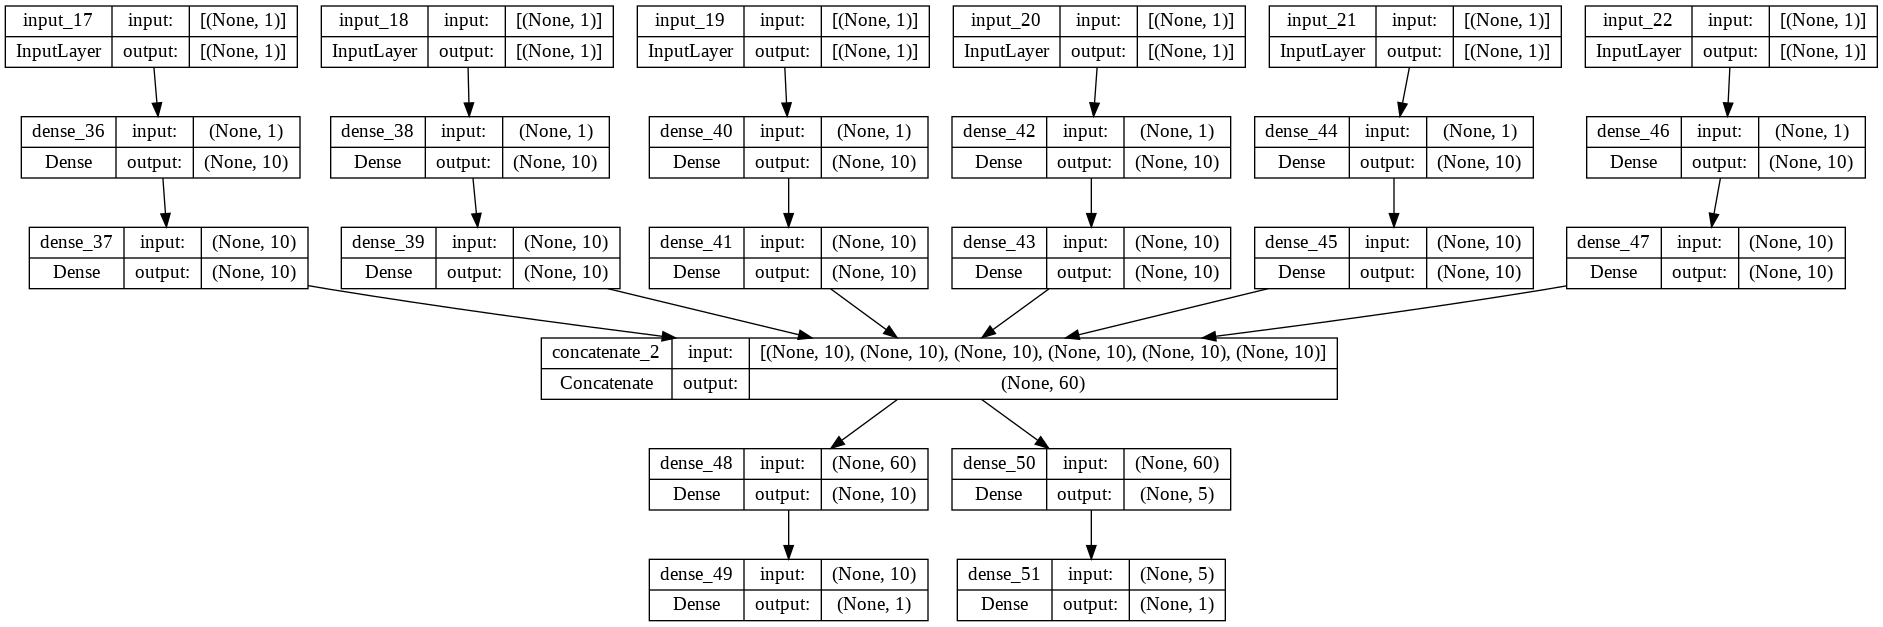

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
x1s=inputDataFrame['gold'].to_numpy()
x2s=inputDataFrame['age'].to_numpy()
x3s=inputDataFrame['iron'].to_numpy()
x4s=inputDataFrame['silver'].to_numpy()
x5s=inputDataFrame['inEgypt'].to_numpy()
x6s=inputDataFrame['isAKing'].to_numpy()
y1s=inputDataFrame['real_price'].to_numpy()
y2s=inputDataFrame['black_market_price'].to_numpy()

In [ ]:
x1s=x1s.reshape(x1s.shape[0],1)
x2s=x2s.reshape(x2s.shape[0],1)
x3s=x3s.reshape(x3s.shape[0],1)
x4s=x4s.reshape(x4s.shape[0],1)
x5s=x5s.reshape(x5s.shape[0],1)
x6s=x6s.reshape(x6s.shape[0],1)

In [ ]:
x=np.concatenate((x1s,x2s,x3s,x4s,x5s,x6s),axis=1)

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
x1Train, x1Test, x2Train, x2Test,  x3Train, x3Test, x4Train, x4Test, x5Train, x5Test,x6Train, x6Test, y1sTrain, y1sTest,y2sTrain, y2sTest = train_test_split(x1s,x2s,x3s,x4s,x5s,x6s, y1s, y2s, test_size=0.20, random_state=42)

In [ ]:
# configure the training
model.compile(loss='mse',metrics=['mse'],optimizer=tf.optimizers.Adam(learning_rate=0.005))

In [ ]:
# train the model. just run a few epochs for this test run. you can adjust later.
history=model.fit(x=[x1Train, x2Train, x3Train, x4Train, x5Train, x6Train],y=[y1sTrain,y2sTrain],validation_data=([x1Test,x2Test,x3Test,x4Test,x5Test,x6Test],[y1sTest,y2sTest]),batch_size=64, epochs=30)

Epoch 1/30
13/13 [==============================] - 2s 39ms/step - loss: 1634196132986880.0000 - dense_49_loss: 92075040768.0000 - dense_51_loss: 1634104059625472.0000 - dense_49_mse: 92075040768.0000 - dense_51_mse: 1634104059625472.0000 - val_loss: 1621373910777856.0000 - val_dense_49_loss: 77323706368.0000 - val_dense_51_loss: 1621296332931072.0000 - val_dense_49_mse: 77323706368.0000 - val_dense_51_mse: 1621296332931072.0000
Epoch 2/30
13/13 [==============================] - 0s 8ms/step - loss: 1618914639347712.0000 - dense_49_loss: 64701427712.0000 - dense_51_loss: 1618849812185088.0000 - dense_49_mse: 64701427712.0000 - dense_51_mse: 1618849812185088.0000 - val_loss: 1602289760468992.0000 - val_dense_49_loss: 44982980608.0000 - val_dense_51_loss: 1602244797530112.0000 - val_dense_49_mse: 44982980608.0000 - val_dense_51_mse: 1602244797530112.0000
Epoch 3/30
13/13 [==============================] - 0s 8ms/step - loss: 1595183871295488.0000 - dense_49_loss: 30149455872.0000 - dense